In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
TSdata = pd.read_csv("Treasury Squeeze raw score data.csv",index_col=0)
#convert label from True or False to 0,1
TSdata["squeeze"] = TSdata["squeeze"].astype(int)
X, y = TSdata.drop(["squeeze","contract"],axis=1) ,TSdata['squeeze']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=999)
max_acc, best_k= -1,-1
acc_list = []
ks = np.arange(1,21)
for k in ks:
    # train model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)
    if acc > max_acc:
        max_acc=acc
        best_k = k
print("Accuracy: {:.2f}% and best k : {}".format(max_acc * 100,best_k))

Accuracy: 62.78% and best k : 13


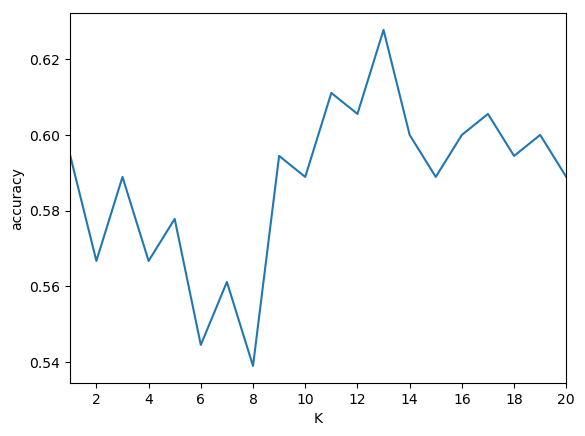

In [5]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.plot(ks,acc_list)
ax.set_xlim(ks.min(), ks.max())
ax.set_xlabel("K")
ax.set_ylabel("accuracy")
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.5888888888888889


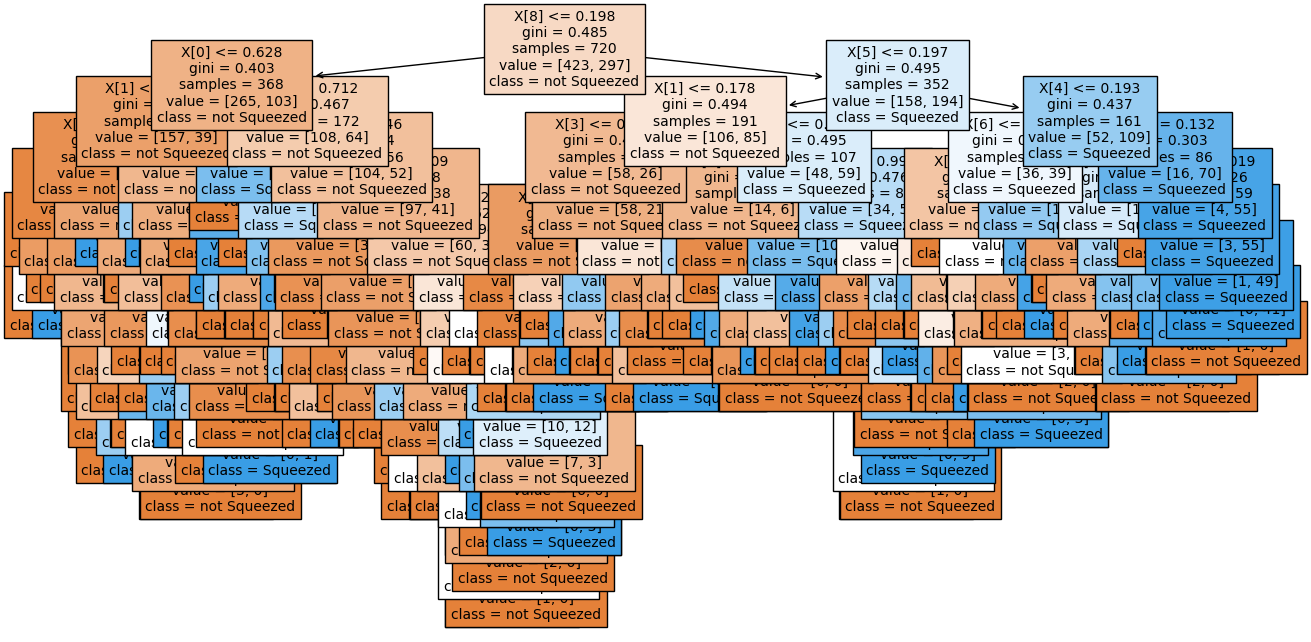

In [7]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf, filled=True, fontsize=10, class_names=["not Squeezed",'Squeezed'])
plt.show()

In [8]:
print("My name is Hyoung Woo Hahm")
print("My NetID is: 661790448")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hyoung Woo Hahm
My NetID is: 661790448
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
